<a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  /></a>

# Exploratory Data Analysis Lab


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv'
survey_df = pd.read_csv(url)

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


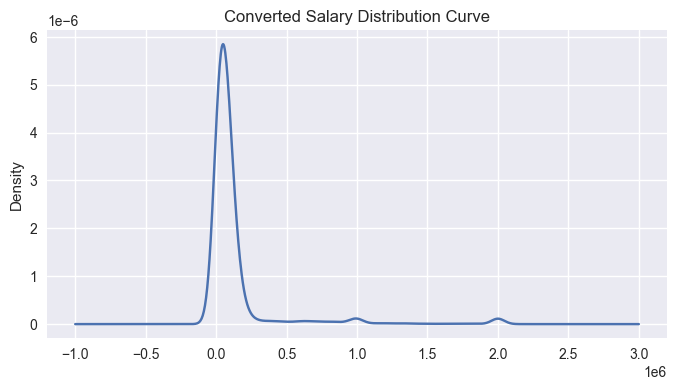

In [3]:
# Your code here
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
survey_df['ConvertedComp'].plot(kind='kde', title='Converted Salary Distribution Curve', figsize=(8,4))
plt.show()

Plot the histogram for the column `ConvertedComp`.


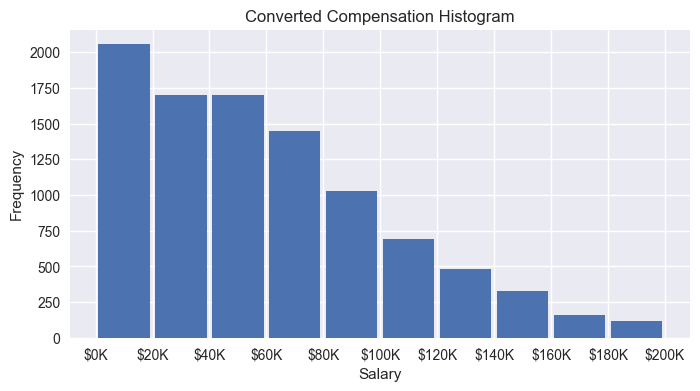

In [4]:
# Your code here
bin_edges = [x for x in range(0, 220000, 20000)]
bin_lbls = ["$" + str(x)[:-4] + "0K" for x in bin_edges]
survey_df['ConvertedComp'].plot.hist(bins=bin_edges, rwidth=0.9, xlabel='Salary', title='Converted Compensation Histogram', figsize=(8,4))
plt.xticks(ticks=bin_edges, labels=bin_lbls)
plt.show()

What is the median of the column `ConvertedComp`?


In [5]:
# Your code here
print(f'Converted Compensation median: ${survey_df["ConvertedComp"].median():,.0f}\n')

Converted Compensation median: $57,745



How many responders identified themselves only as a **Man**?


In [6]:
# Your code here
print(f'Responders indentifying only as a Man: {len(survey_df["Gender"] == "Man"):,}\n')

Responders indentifying only as a Man: 11,398



Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [7]:
# Your code here
comp_women = int(survey_df[survey_df['Gender'] == 'Woman']['ConvertedComp'].median())
print(f'Converveted compensation median for Women: ${comp_women:,}\n')

Converveted compensation median for Women: $57,708



Give the five number summary for the column `Age`?


In [8]:
# Your code here
pd.DataFrame(survey_df['Age'].describe())

,Age
count,11111.000000
mean,30.778895
std,7.393686
min,16.000000
25%,25.000000
50%,29.000000
75%,35.000000
max,99.000000


Plot a histogram of the column `Age`.


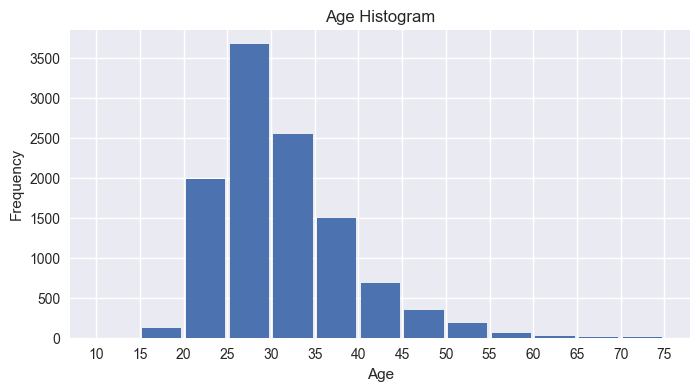

In [9]:
# Your code here
bin_edges = [x for x in range(10, 80, 5)]
survey_df['Age'].plot.hist(bins=bin_edges, rwidth=0.9, xlabel='Age', title='Age Histogram', figsize=(8,4))
plt.xticks(ticks=bin_edges, labels=bin_edges)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


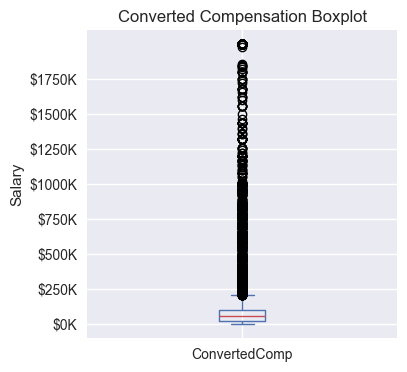

In [10]:
# Your code here
survey_df['ConvertedComp'].plot.box(ylabel='Salary', title='Converted Compensation Boxplot', figsize=(4,4))
y_ticks = [x for x in range(0, 2000000, 250000)]
y_lbls = ["$" + str(x)[:-4] + "0K" for x in y_ticks]
plt.yticks(ticks=y_ticks, labels=y_lbls)
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [11]:
comp_1q = survey_df['ConvertedComp'].quantile(.25)
comp_3q = survey_df['ConvertedComp'].quantile(.75)
comp_iqr = comp_3q - comp_1q
print(f'Converted Compensation IQR: ${comp_iqr:,.0f}\n')

Converted Compensation IQR: $73,132



Find out the upper and lower bounds.


In [12]:
# Your code here
# Calcuate upper bound as Q3 + (1.5 x IQR)
comp_up = comp_3q + (1.5 * comp_iqr)
print(f'Converted Compensation Upper Bound: ${comp_up:,.0f}')

# Calcuate upper bound as Q3 + (1.5 x IQR)
comp_low = comp_1q - (1.5 * comp_iqr)
print(f'Converted Compensation Lower Bound: ${comp_low:,.0f}\n')

Converted Compensation Upper Bound: $209,698
Converted Compensation Lower Bound: $-82,830



Identify how many outliers are there in the `ConvertedComp` column.


In [13]:
# Your code here
outliers = len(survey_df[survey_df['ConvertedComp'] > comp_up]) - len(survey_df[survey_df['ConvertedComp'] < comp_low])
print(f'Number of Outliers in Converted Compensation: {outliers}\n')

Number of Outliers in Converted Compensation: 879



Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [14]:
# Your code here
# Note: this code will also effectively drop any rows with NaN for ConvertedComp
new_survey_df = survey_df[(survey_df['ConvertedComp'] < comp_up) & (survey_df['ConvertedComp'] > comp_low)]

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [15]:
# Your code here
survey_df.corr(numeric_only=True)['Age']

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date              | Version  | Changed By        | Change Description                 |
| :---------------- | :------: | :---------------- | :--------------------------------- |
| 2024-May-19       | 0.2      | Tami McManus      | Completed cells per assingment     |
| 2020-Oct-17       | 0.1      | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
